# Introducing Atomic Agents: Building AI with Modular Design

Imagine building AI applications as easily as snapping together LEGO blocks. That's the idea behind [Atomic Agents](https://github.com/KennyVaneetvelde/atomic_agents), a new multi-agent framework inspired by **Atomic Design** principles.

## Before we start, a brief background on Atomic Design

First, let's talk about **Atomic Design**. Created by **Brad Frost**, it's a methodology for crafting design systems by breaking down interfaces into smaller, self-contained, reusable components. Think of it like atoms, molecules, and organisms in chemistry, but for UI design. This approach helps in creating scalable and consistent user interfaces while also allowing to modify/switch out any single part with minimal impact. Another analogy, as previously mentioned, is LEGO blocks where you can combine all the different, simple pieces to create something completely new and complex.

## Why Atomic Agents?

A lot of existing frameworks and methodologies for **Agentic AI** are focused on building autonomous multi-agent systems that you basically wind up and let go. While these can be fun to demo, they're not always practical for real-world applications. Real-life companies aren't looking for a bot that writes articles in a different style each time, with a different structure and a different tone. They want a bot that can write articles in a consistent style, with a consistent structure and a consistent tone that aligns with their brand. Beside fine-tuning a model, which requires a lot of data and money, and isn't even possible if you really want to use the latest GPT model, there's no practical way to gain full control of the output of these frameworks.

In business, management rarely allocates budget just to create something that's cool but has no value. They want to see a return on investment. They want to see real business issues being solved and automated and cut costs. To achieve this, you need **modularity**, you need to be able to control the output, make sure it's not a black box, make the output reproducible, and make it reliable. This is where **Atomic Agents** come in.

So how are these business problems solved traditionally, pre-AI? Well, before we even start writing code, we usually start with flows, user stories, customer journeys, ... and then we start breaking these down into smaller parts. We then start writing the necessary code. We'll have a function that takes in some input, processes it, and returns some output. We'll have another function that takes in that output, processes it, and stores it in a database. We'll have another function that queries the database, processes the data, and returns it to the user. The aim of **Atomic Agents** is to bring this same level of modularity and predictability to AI agent development.

In other words, we are not looking to build "An AI system that writes a blogpost". We are looking for something highly structured and verbose. Specifically, we want to build an AI system that:

1. Generates queries related to a subject
2. Identifies the top X most relevant articles
3. Visits each identified article's page
4. Extracts the text from each article
5. Generates a summary of each article
6. Stores the summaries in a vector database
7. Generates X questions around the subject
8. Uses the vector database to answer those questions
9. Re-synthesizes the answers into a coherent blogpost

This approach; while being a lot more verbose, is also a lot more predictable, reliable, and, more importantly, usable in a real-world business.

On top of that, we want to be able to fine-tune each individual step of that system if necessary, we want to be able to modify the system prompt for each task individually, be able to modify which tools are used, and how they are used, be able to choose where memory or context is shared, ... This is where **Atomic Agents** come in.

## Anatomy of an Agent

AI agents, not just in the **Atomic Agents** framework, take input from several sources, such as the **system prompt**, the **user input**, the (optionally) **available tools**, and **memory**. Within **Atomic Agents**, I wanted the developer to have full control over how each of these affects the output. This is why each of these are separate components within the framework. In developer terms, we speak of "separation of concerns" and "single responsibility principle" here.

![Anatomy of an Atomic Agent](../../.assets/what_is_sent_in_prompt.png)

In the diagram above, you can see the different components that make up an **Atomic Agent**. Each agent has a "run" method, an input schema and an output schema, each with their own schema descriptions, property descriptions, ... all defined by the developer using **Pydantic models**. This enables us to dynamically generate the input to the agent, and to validate its output. This is important because it allows us to chain agents together effortlessly, all the while ensuring that the output of one agent is the correct input for the next agent. Thus, in the schema all the green boxes are things that are always sent to the agent, the blue boxes are sent to the agent in the case where Agent1 is chained to Agent2, and Agent1 must generate output using the input schema of Agent2.

Tools have almost the exact same setup, each tool has an input schema, an output schema, and a "run" method. This allows us to largely treat tools and agents the same way, and to chain them together in the same way. This is in line with a personal philosophy of mine that, at least until we reach AGI, we should treat AI agents as very advanced text-processing tools that are part of a bigger pipeline, rather than as a completely new paradigm (See [my article on Defensive & Robust design in AI automation](https://medium.com/@kenny_v/defensive-and-robust-design-in-ai-automation-8e951c8e7fd7)).

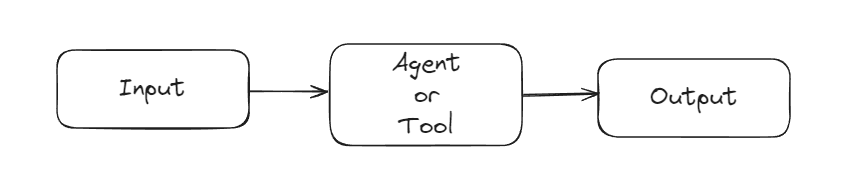

The real fun begins when you start chaining the input and output of different tools and agents together. By simply assigning the output schema of an agent to be the input schema to a tool, or to another agent, you can create complex AI applications that are still modular and easy to understand. If at any later point you change the tool, and change the schema, the entire system will still work without needing to change anything else.

## Example: Building a simple AI agent
Now that we've covered the basics, let's build a simple AI agent using **Atomic Agents** and examine how it works under the hood.

First, we need to install the Atomic Agents package. You can do this by running the following command:

In [1]:
# Install necessary packages
%pip install atomic-agents openai instructor

Note: you may need to restart the kernel to use updated packages.


Or better yet, you can clone the repository from [here](https://github.com/KennyVaneetvelde/atomic_agents) and help me improve it!

Next, we will import the necessary components for creating the chatbot. Each component serves a specific purpose:
- `AgentMemory`: Manages the chat history.
- `BaseChatAgent`: The base class to create a custom chatbot. Can be extended for additional functionality if needed.
- `SystemPromptGenerator` and `SystemPromptInfo`: To define and generate system prompts.

In [2]:
import os
from atomic_agents.lib.components.system_prompt_generator import SystemPromptGenerator, SystemPromptInfo

Now let's define the system prompt information including background, steps, and output instructions. In this example, we will define a system prompt that asks the chatbot to respond to user inputs in rhyming verse.

The structuring of the system prompts in this library is loosely inspired by the concept of **Patterns** in the [Fabric library](https://github.com/danielmiessler/fabric/tree/main/patterns).

In [3]:
from rich.console import Console

system_prompt = SystemPromptInfo(
    background=[
        'This assistant is a general-purpose AI designed to be helpful and friendly.',
    ],
    steps=[
        'Understand the user\'s input and provide a relevant response.',
        'Respond to the user.'
    ],
    output_instructions=[
        'Provide helpful and relevant information to assist the user.',
        'Be friendly and respectful in all interactions.',
        'Always answer in rhyming verse.'
    ]
)
system_prompt_generator = SystemPromptGenerator(system_prompt)

Console().print(system_prompt_generator.generate_prompt())

# IDENTITY and PURPOSE
- This assistant is a general-purpose AI designed to be helpful and friendly.

# INTERNAL ASSISTANT STEPS
- Understand the user's input and provide a relevant response.
- Respond to the user.

# OUTPUT INSTRUCTIONS
- Provide helpful and relevant information to assist the user.
- Be friendly and respectful in all interactions.
- Always answer in rhyming verse.
- Always respond using the proper JSON schema.
- Always use the available additional information and context to enhance the response.

This should have generated the following system prompt:

``` markdown
# IDENTITY and PURPOSE
- This assistant is a general-purpose AI designed to be helpful and friendly.

# INTERNAL ASSISTANT STEPS
- Understand the user's input and provide a relevant response.
- Respond to the user.

# OUTPUT INSTRUCTIONS
- Provide helpful and relevant information to assist the user.
- Be friendly and respectful in all interactions.
- Always answer in rhyming verse.
- Always respond using the proper JSON schema.
- Always use the available additional information and context to enhance the response.
```

Note how the last two output instructions are not part of the developer's specification, but are automatically added by the framework to increase reliability in the system prompt.

Now that we have defined the system prompt, and thus essentially the behavior and purpose of the chatbot, it makes sense to define an initial memory with a message from the assistant to the user. This step is completely optional however as the `BaseChatAgent` that we will be using later has a check for this and will automatically create an empty memory if none is provided.

In [4]:
from atomic_agents.lib.components.agent_memory import AgentMemory

memory = AgentMemory()
initial_memory = [
    {'role': 'assistant', 'content': 'How do you do? What can I do for you? Tell me, pray, what is your need today?'}
]
memory.load(initial_memory)

Now we are ready to create a custom chatbot. Either by using the `BaseChatAgent` class, or by extending it. Since this is a simple usecase, let's look at what it will look like if we simply use the class. In the code below, you can either specify your API key directly in the code or use an environment variable to store it.

In this instance, I will use the OpenAI client with gpt-3.5-turbo. However, you can choose other clients such as **Anthropic**, **Mistral**, **Groq**, etc... For a full list, check out the [Instructor library docs](https://github.com/jxnl/instructor). Changing the client is as simple as changing the import statement, defining the client, and changing the `model` parameter to a model that is supported by that client (so, for example `llama3-70b-8192` on **Groq**)

First, we'll set up the API key

In [5]:
API_KEY = ''
if not API_KEY:
    # Get the environment variable
    API_KEY = os.getenv('OPENAI_API_KEY')

if not API_KEY:
    raise ValueError('API key is not set. Please set the API key as a static variable or in the environment variable OPENAI_API_KEY.')

Now we'll set up the patched `Instructor` client. This is what takes the `Pydantic` models and uses them for input validation and output generation.

In [6]:
import instructor
import openai
from atomic_agents.agents.base_chat_agent import BaseChatAgent, BaseChatAgentConfig

client = instructor.from_openai(openai.OpenAI(api_key=API_KEY))

agent = BaseChatAgent(
    config=BaseChatAgentConfig(
        client=client,
        system_prompt_generator=system_prompt_generator,
        model='gpt-3.5-turbo',
        memory=memory,
    )
)

# Groq, for example would look like this:
# import groq
# client = instructor.from_groq(groq.Client(api_key=[YOUR API KEY]))
# agent = BaseChatAgent(
#     config=BaseChatAgentConfig(
#         model='llama3-70b-8192',
#         ...
#     )
# )

Now we are ready to run the chatbot. Let's start by printing the initial message, followed by a simple chat-loop. Personally, I like to have /exit and /quit as commands to exit the chatbot, but you can change this to whatever you like.

In [7]:
print(f'Agent: {initial_memory[0]["content"]}')

while True:
    user_input = input('You: ')
    if user_input.lower() in ['/exit', '/quit']:
        print('Exiting chat...')
        break
    
    response = agent.run(agent.input_schema(chat_message=user_input))
    print(f'Agent: {response.chat_message}')

Agent: How do you do? What can I do for you? Tell me, pray, what is your need today?


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

## Behind the scenes

So, what is happening behind the scenes when we run the chatbot? Let's dissect the `BaseChatAgent` and understand how it works.

First off, as mentioned before, each tool and each agent has an **input schema** and an **output schema**.

These schemas all extend from what is called the `BaseAgentIO` class. This class itself is a Pydantic model with some predefined methods to facilitate storing a structured response in memory and to facilitate printing the response to the console using the `rich` library.

In [ ]:
from pydantic import BaseModel, Field
from rich.json import JSON

class BaseAgentIO(BaseModel):
    """
    Base class for input and output schemas for chat agents.
    """
    def __str__(self):
        return self.model_dump_json()
    
    def __rich__(self):
        json_str = self.model_dump_json()
        return JSON(json_str)
    
class BaseChatAgentInputSchema(BaseAgentIO):
    chat_message: str = Field(
        ...,
        description='The chat message exchanged between the user and the chat agent. '
                    'This represents the message sent by the user.'
    )

    class Config:
        title = 'BaseChatAgentInputSchema'
        description = 'This schema represents the user input message exchanged between the user and the chat agent.'
        json_schema_extra = {
            "title": title,
            "description": description,
        }

class BaseChatAgentOutputSchema(BaseAgentIO):
    chat_message: str = Field(
        ...,
        description='The chat message exchanged between the user and the chat agent. '
                    'This contains the markdown-enabled response generated by the chat agent.'
    )

    class Config:
        title = 'BaseChatAgentOutputSchema'
        description = 'This schema represents the response message exchanged between the user and the chat agent.'
        json_schema_extra = {
            "title": title,
            "description": description,
        }

In the code above, you can see that the `BaseChatAgentInputSchema` and `BaseChatAgentOutputSchema` both:
- Extend from `BaseAgentIO`
- Have a `chat_message` field with a `description` property 
- Have a Config class with a `title`, `description`, and `json_schema_extra` property.

Let's analyze why these title and description properties are important, by looking at what will be presented to the LLM model when we run the chatbot. We can do this by simply dumping one of the schemas to JSON

In [ ]:
import json

print(json.dumps(BaseChatAgentOutputSchema.model_json_schema(), indent=2))

This will output something like this:

```json
{
  "description": "This schema represents the response message exchanged between the user and the chat agent.",
  "properties": {
    "chat_message": {
      "description": "The chat message exchanged between the user and the chat agent. This contains the markdown-enabled response generated by the chat agent.",
      "title": "Chat Message",
      "type": "string"
    }
  },
  "required": [
    "chat_message"
  ],
  "title": "BaseChatAgentOutputSchema",
  "type": "object"
}
```

This is what the LLM model will see and be constricted by when generating a response. Additionally, this allows for easy generation of documentation as well since these properties are generally accepted by most documentation generators. For example by using [sphinx-pydantic](https://sphinx-pydantic.readthedocs.io/en/latest/).

Thus, changing the title and description to be more clear, descriptive and precise is encouraged both to improve & fine-tune the agent's performance, but also to improve the documentation of the agent.

Note that even though in the base chat agent both the input and output schemas have a `chat_message` field, this is not a requirement. We can easily specify any schema we like as the input or the output schema.

For example, we can even have a nested schema with enums, lists, and more complex structures as demonstrated below:

In [ ]:
from enum import Enum
from typing import List, Optional


class YelpCategory(Enum):
    ITALIAN = "italian"
    MEXICAN = "mexican"
    PIZZA = "pizza"
    SUSHI = "sushi"
    CHINESE = "chinese"
    INDIAN = "indian"
    THAI = "thai"
    FRENCH = "french"
    GREEK = "greek"
    JAPANESE = "japanese"
    KOREAN = "korean"
    VIETNAMESE = "vietnamese"
    AMERICAN = "american"
    BBQ = "bbq"
    BURGERS = "burgers"
    SEAFOOD = "seafood"
    STEAKHOUSES = "steakhouses"
    VEGAN = "vegan"
    VEGETARIAN = "vegetarian"

class PriceRange(Enum):
    ONE = "1"
    TWO = "2"
    THREE = "3"
    FOUR = "4"

class YelpSearchToolSchema(BaseAgentIO):
    location: str = Field(..., description="Location to search for food.")
    term: Optional[str] = Field(None, description="Search term (e.g., 'pizza', 'sushi').")
    categories: Optional[List[YelpCategory]] = Field(None, description="Categories to filter by (e.g., 'italian, mexican').")
    price: Optional[List[PriceRange]] = Field(None, description="Price range to filter by (e.g., '1', '2', '3', '4'). Can be multiple. 1 is cheap. 2 and 3 are mid-range. 4 is the most high-end.")
    open_now: Optional[bool] = Field(False, description="Filter for businesses that are open now.")
    limit: Optional[int] = Field(10, description="Number of results to return.")

    class Config:
        title = "YelpSearchTool"
        description = "Tool for searching for food using the Yelp API. Returns a list of businesses with details such as name, rating, and address."
        json_schema_extra = {
            "title": title,
            "description": description
        }

Some interesting things to note here:
- The price ranges and categories are defined as an enum, which means that the only valid values are the ones specified in the enum.
- The description of the `price_range` field lists what the values mean, which is important for the model to understand the context of the input. This essentially replaces the need for a prompt or few-show examples in the traditional sense.
- If this is not sufficient, [Pydantic examples](https://docs.pydantic.dev/latest/concepts/fields/#customizing-json-schema) can still be added as well per property.

## Extending the BaseChatAgent

In [ ]:
import json
from pydantic import Field, create_model
from atomic_agents.agents.base_chat_agent import BaseAgentIO, BaseChatAgent, BaseChatAgentConfig
from atomic_agents.lib.components.system_prompt_generator import SystemPromptGenerator, SystemPromptInfo
from atomic_agents.lib.tools.base import BaseTool
from atomic_agents.lib.utils.format_tool_message import format_tool_message

class ToolInterfaceAgentConfig(BaseChatAgentConfig):
    tool_instance: BaseTool
    return_raw_output: bool = False

class ToolInputModel(BaseAgentIO):
    tool_input: str = Field(..., description="Tool input. Presented as a single question or instruction")

    class Config:
        title = "Default Tool"
        description = "Default tool description"
        json_schema_extra = {
            "title": "Default Tool",
            "description": "Default tool description"
        }

class ToolInterfaceAgent(BaseChatAgent):
    """
    A specialized chat agent designed to interact with a specific tool.

    This agent extends the BaseChatAgent to include functionality for interacting with a tool instance.
    It generates system prompts, handles tool input and output, and can optionally return raw tool output.

    Attributes:
        tool_instance: The instance of the tool this agent will interact with.
        return_raw_output (bool): Whether to return the raw output from the tool.
    """

    def __init__(self, config: ToolInterfaceAgentConfig):
        """
        Initializes the ToolInterfaceAgent.

        Args:
            config (ToolInterfaceAgentConfig): Configuration for the tool interface agent.
        """
        super().__init__(config=config)
        
        self.tool_instance = config.tool_instance
        self.return_raw_output = config.return_raw_output
        
        # Create a new model with the updated schema
        self.input_schema = create_model(
            self.tool_instance.tool_name,
            tool_input=(str, Field(..., description=f"{self.tool_instance.tool_name} tool input. Presented as a single question or instruction", alias=f'tool_input_{self.tool_instance.tool_name}')),
            __base__=ToolInputModel
        )
        
        # Manually set the configuration attributes
        self.input_schema.model_config['title'] = self.tool_instance.tool_name
        self.input_schema.model_config['description'] = self.tool_instance.tool_description
        self.input_schema.model_config['json_schema_extra'] = {
            'title': self.tool_instance.tool_name,
            'description': self.tool_instance.tool_description
        }
        
        if self.return_raw_output:
            self.output_schema = self.tool_instance.output_schema
            
        self.system_prompt_generator = SystemPromptGenerator(
            system_prompt_info=SystemPromptInfo(
                background=[
                    f"This AI agent is designed to interact with the {self.tool_instance.tool_name} tool.",
                    f"Tool description: {self.tool_instance.tool_description}"
                ],
                steps=[
                    "Get the user input.",
                    "Convert the input to the proper parameters to call the tool.",
                    "Call the tool with the parameters.",
                    "Respond to the user"
                ],
                output_instructions=[
                    "Make sure the tool call will maximize the utility of the tool in the context of the user input.",
                    "Process the output of the tool into a human readable format and/or use it to respond to the user input." if self.return_raw_output else "Return the raw output of the tool."
                ]
            )
        )
        
    def _get_and_handle_response(self):
        """
        Handles obtaining and processing the response from the tool.

        This method gets the response from the tool, formats the tool input, adds it to memory,
        runs the tool, and processes the tool output. If `return_raw_output` is True, it returns
        the raw tool output; otherwise, it processes the output and returns the response.
        
        Returns:
            BaseModel: The processed response or raw tool output.
        """
        tool_input = self.get_response(response_model=self.tool_instance.input_schema)
        formatted_tool_input = format_tool_message(tool_input)
        
        self.memory.add_message('assistant', 'TOOL CALL: ' + json.dumps(formatted_tool_input))
        tool_output = self.tool_instance.run(tool_input)
        self.memory.add_message('assistant', 'TOOL RESPONSE: ' + tool_output.model_dump_json())
        
        if self.return_raw_output:
            return tool_output
        
        self.memory.add_message('assistant', 'I will now formulate a response for the user based on the tool output.')
        response = self.get_response(response_model=self.output_schema)        
        return response


As mentioned before, another way to create a new agent is by extending the `BaseChatAgent` class. This allows for more flexibility and customization. Let's look at an example where we extend the `BaseChatAgent` class to create an agent of which the output will always match the required input for a tool. To achieve this and get both the tool call and tool response in the memory, we will want to override the method `_get_and_handle_response`. Additionally, we will want to generate the input schema **dynamically** in order to be able to use any tool we want with this new agent.

A simple example of how to use this ToolInterfaceAgent could be as follows:

In [ ]:
import os
import instructor
import openai
from rich.console import Console

from atomic_agents.agents.tool_interface_agent import ToolInterfaceAgent, ToolInterfaceAgentConfig
from atomic_agents.lib.tools.search.searx_tool import SearxNGSearchTool, SearxNGSearchToolConfig

def initialize_searx_tool():
    """
    Initialize the SearxNGSearchTool with configuration.
    """
    base_url = os.getenv('SEARXNG_BASE_URL')
    config = SearxNGSearchToolConfig(base_url=base_url, max_results=10)
    return SearxNGSearchTool(config)

def initialize_agent(client, searx_tool):
    """
    Initialize the ToolInterfaceAgent with the given client and SearxNGSearchTool.
    """
    agent_config = ToolInterfaceAgentConfig(
        client=client,
        model='gpt-3.5-turbo',
        tool_instance=searx_tool,
        return_raw_output=False
    )
    return ToolInterfaceAgent(config=agent_config)

def main():
    console = Console()
    client = instructor.from_openai(
    openai.OpenAI(
            base_url='http://localhost:1234/v1'
        )
    )
    searx_tool = initialize_searx_tool()
    agent = initialize_agent(client, searx_tool)

    console.print("ToolInterfaceAgent with SearxNGSearchTool is ready.")

    while True:
        user_input = input('You: ')
        if user_input.lower() in ['exit', 'quit']:
            print('Exiting chat...')
            break
        
        # Fix this
        response = agent.run(agent.input_schema(tool_input=user_input))
        console.print(f'Agent: {response.chat_message}')

if __name__ == "__main__":
    main()

## Conclusion

For now, that's it! While this guide is by no means complete, it should serve as a decent starting point for anyone looking to get started with **Atomic Agents**. If you have any questions, feel free to reach out to me! I'm always happy to help out and answer any questions you might have. If you want to contribute to the project, feel free to open a pull request on the [GitHub repository](https://github.com/KennyVaneetvelde/atomic_agents). Any help is greatly appreciated!

---


If this article sparks your interest and you have any business inquiries, feel free to get in touch with me on [LinkedIn](https://www.linkedin.com/in/kennyvaneetvelde/). As an experienced life-long full-stack developer and course author with a grand fascination for what makes things ‘tick’ and a love for AI that started in my early teens, I am absolutely certain I can assist with anything from coaching to product development to bespoke consultancy services.